In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('health_revenue.csv')

In [3]:
data

,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
0,1847,Profit,Urban,23,0.40,12,2.04,55684.18
1,422,Profit,Urban,22,0.60,11,2.77,117115.85
2,1843,Public,Rural,47,0.37,31,3.13,72794.56
3,14,Non-Profit,Urban,20,0.06,47,1.30,87447.23
4,1880,Public,Rural,33,0.94,40,5.90,88848.01
...,...,...,...,...,...,...,...,...
1985,112,Profit,Urban,46,0.99,46,5.62,138695.55
1986,257,Public,-,15,0.23,33,2.95,134584.60
1987,843,Public,Rural,49,0.13,17,1.94,110533.42
1988,733,Public,Rural,30,0.90,49,NaN,136719.84


Data Validation

In [4]:
# perform data validation and data cleaning checks for each column
print(data['clinic_id'].unique())
print(data['clinic_id'].value_counts())
print(data['clinic_id'].isnull().sum())
print(data['clinic_id'].isnull().sum() / len(data['clinic_id']) * 100)

# result - no null values, clinic_id can be used multiple times
# clinic_id is meant to be a unique identifier for the clinics but several clinic_id have been repeated,
# which indicates that several clinics have provided the data at different timestamps

[1847  422 1843 ... 1346  257   71]
1877    7
153     5
991     5
441     5
546     4
       ..
635     1
905     1
88      1
824     1
71      1
Name: clinic_id, Length: 1241, dtype: int64
0
0.0


In [5]:
for col in data.columns:
    print('Details for column: ', col)
    #print(data[col].unique())
    print(data[col].value_counts())
    print(data[col].isnull().sum())   
    print(data[col].isnull().sum() / len(data[col]) * 100)

Details for column:  clinic_id
1877    7
153     5
991     5
441     5
546     4
       ..
635     1
905     1
88      1
824     1
71      1
Name: clinic_id, Length: 1241, dtype: int64
0
0.0
Details for column:  ownership
Profit         987
Public         566
Non-Profit     398
non_profitt     39
Name: ownership, dtype: int64
0
0.0
Details for column:  hospital_location
Urban    1109
Rural     762
-         119
Name: hospital_location, dtype: int64
0
0.0
Details for column:  admitted_patients
16    56
5     52
17    52
43    51
22    50
36    47
46    47
44    47
38    46
4     46
35    46
7     45
45    44
13    43
40    43
48    43
28    43
20    43
47    43
25    42
19    42
41    42
18    41
23    41
15    41
24    41
30    40
32    40
2     39
1     39
39    39
37    39
27    37
10    37
26    37
29    37
11    37
12    36
3     36
34    36
33    36
49    35
42    34
21    34
9     33
8     31
14    30
31    29
6     22
Name: admitted_patients, dtype: int64
0
0.0
Details for colum

In [6]:
# result - in ownership column two values should be same 'Non-Profit' and 'non-profitt'. 
# Removing this spelling mistake and naming all values as 'Non-Profit'

# for 119 rows, hospital_type is '-', replacing it with 'Not Available'

# admitted patients - all values are discrete and positive integers, thus this columns can be used as is

# nurse_patient_ratio - for 7 rows nurse patient ratio is 0, which needs to be looked into, as this would mean 7 clinics which do not have any nurse, which is an unlikely scenerio



# for 159 rows, satisfaction score is null, synthetic scores are added later to fix this

# for column ed_visits, only positive integer values should exist, but data has negative values as well

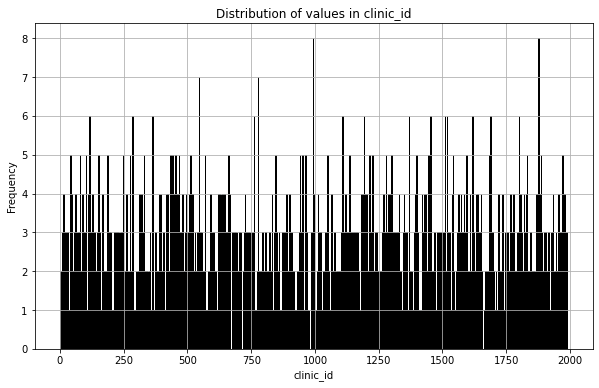

In [7]:
# data cleaning and validation for each columns
# col - clinic_id
column_to_visualize = 'clinic_id'

plt.figure(figsize=(10, 6))
plt.hist(data[column_to_visualize], bins=1000, color='skyblue', edgecolor='black')
plt.title(f'Distribution of values in {column_to_visualize}')
plt.xlabel(column_to_visualize)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
# col - ownership
# replacing 'non-profitt' with 'Non-Profit'
data['ownership'] = data['ownership'].replace('non_profitt', 'Non-Profit')
data['ownership'].value_counts()

Profit        987
Public        566
Non-Profit    437
Name: ownership, dtype: int64

In [9]:
# col - hospital_type
# we assume that hospitals above 75 percentile in revenue are urban and below are rural

# 75 percentile
np.percentile(data['revenue'], 75)

data['hospital_location'] = np.where(data['revenue'] > np.percentile(data['revenue'], 75), 'Urban', 'Rural')
data['hospital_location'].value_counts()

Rural    1492
Urban     498
Name: hospital_location, dtype: int64

In [10]:
# col - satisfaction_score
# seeing statistics of satisfaction_score to decide how to replace null values
data['satisfaction_score'].describe()

# replacing null values with median, as it is more robust to outliers
# also we would like to replace by fitting satisfaction_score using a linear regression model, 
# but we don't have enough time to do that

data['satisfaction_score'] = data['satisfaction_score'].fillna(data['satisfaction_score'].median())

In [11]:
# col - ed_visits
# number of negative values  
print(data['ed_visits'][data['ed_visits'] < 0].count())

# replacing negative values by removing the negative sign, as we assume negative sign to be a human error or data entry error,
# other wise it would not make sense for negative values to exist in this column
data['ed_visits'] = np.abs(data['ed_visits'])

59


In [12]:
#check for duplicate values
data.duplicated().sum()

0

In [13]:
data

,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
0,1847,Profit,Rural,23,0.40,12,2.04,55684.18
1,422,Profit,Urban,22,0.60,11,2.77,117115.85
2,1843,Public,Rural,47,0.37,31,3.13,72794.56
3,14,Non-Profit,Rural,20,0.06,47,1.30,87447.23
4,1880,Public,Rural,33,0.94,40,5.90,88848.01
...,...,...,...,...,...,...,...,...
1985,112,Profit,Urban,46,0.99,46,5.62,138695.55
1986,257,Public,Urban,15,0.23,33,2.95,134584.60
1987,843,Public,Rural,49,0.13,17,1.94,110533.42
1988,733,Public,Urban,30,0.90,49,3.44,136719.84


Data Visualization

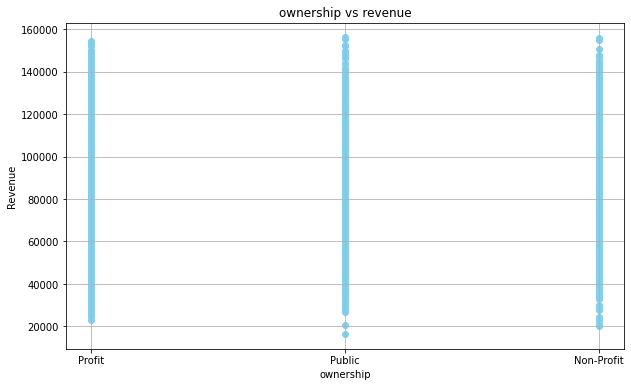

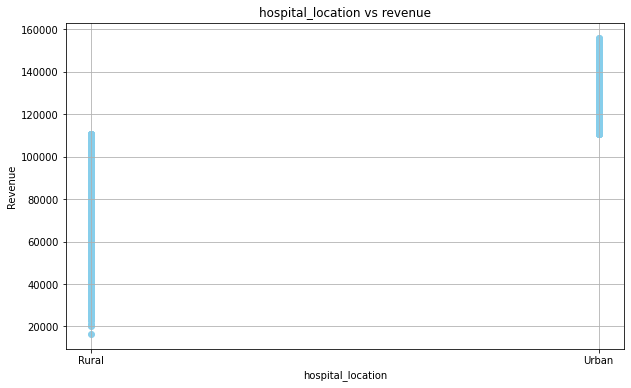

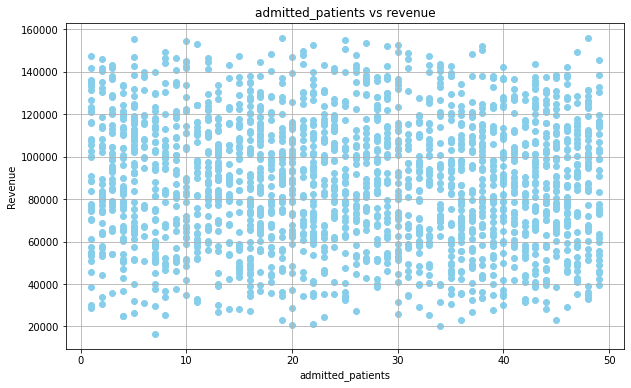

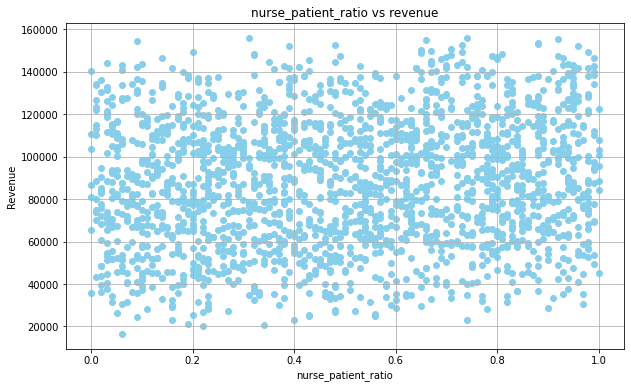

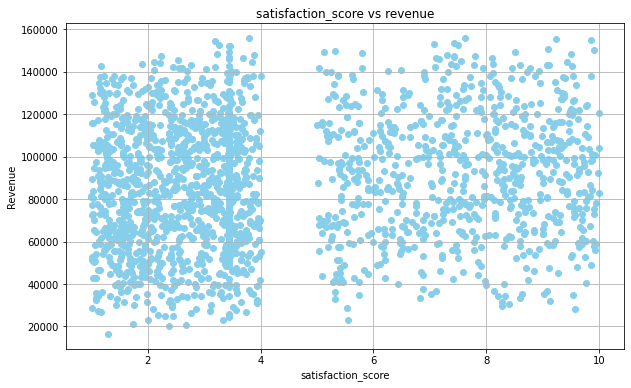

In [16]:
# plotting every column against revenue to see if there is any correlation
# scatterplot
# col - ownership
column_to_visualize = 'ownership'

plt.figure(figsize=(10, 6))
plt.scatter(data[column_to_visualize], data['revenue'], color='skyblue')
plt.title(f'{column_to_visualize} vs revenue')
plt.xlabel(column_to_visualize)
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# col - hospital_location
column_to_visualize = 'hospital_location'

plt.figure(figsize=(10, 6))
plt.scatter(data[column_to_visualize], data['revenue'], color='skyblue')
plt.title(f'{column_to_visualize} vs revenue')
plt.xlabel(column_to_visualize)
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# col - admitted_patients
column_to_visualize = 'admitted_patients'

plt.figure(figsize=(10, 6))
plt.scatter(data[column_to_visualize], data['revenue'], color='skyblue')
plt.title(f'{column_to_visualize} vs revenue')
plt.xlabel(column_to_visualize) 
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


# col - nurse_patient_ratio
column_to_visualize = 'nurse_patient_ratio'

plt.figure(figsize=(10, 6))
plt.scatter(data[column_to_visualize], data['revenue'], color='skyblue')
plt.title(f'{column_to_visualize} vs revenue')
plt.xlabel(column_to_visualize)
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# col - satisfaction_score
column_to_visualize = 'satisfaction_score'

plt.figure(figsize=(10, 6))
plt.scatter(data[column_to_visualize], data['revenue'], color='skyblue')
plt.title(f'{column_to_visualize} vs revenue')
plt.xlabel(column_to_visualize)
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


In [17]:
# observation - all the clinics with high revenue are located in urban areas, thus hospital_location is a good predictor of revenue
# to increase revenue, clinics should be located in urban areas

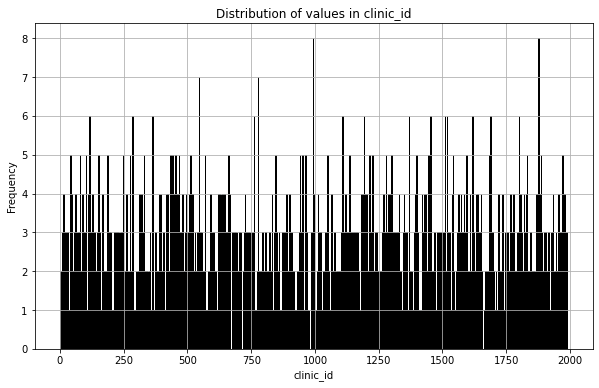

In [18]:
# data cleaning and validation for each columns
# col - clinic_id
column_to_visualize = 'clinic_id'

plt.figure(figsize=(10, 6))
plt.hist(data[column_to_visualize], bins=1000, color='skyblue', edgecolor='black')
plt.title(f'Distribution of values in {column_to_visualize}')
plt.xlabel(column_to_visualize)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

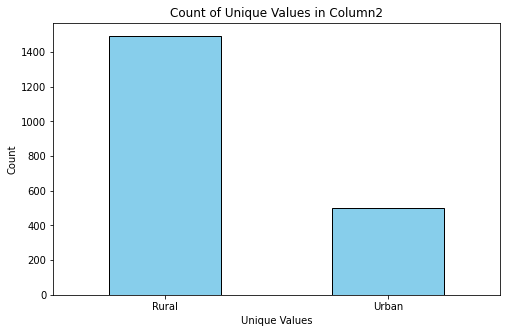

In [19]:
value_counts = data['hospital_location'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Unique Values in Column2')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

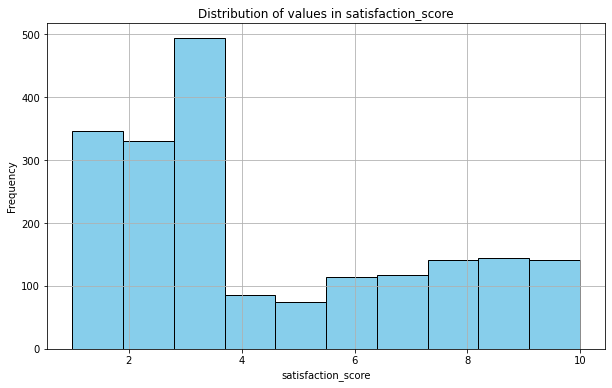

In [20]:
column_to_visualize = 'satisfaction_score'

plt.figure(figsize=(10, 6))
plt.hist(data[column_to_visualize], bins=10, color='skyblue', edgecolor='black')
plt.title(f'Distribution of values in {column_to_visualize}')
plt.xlabel(column_to_visualize)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

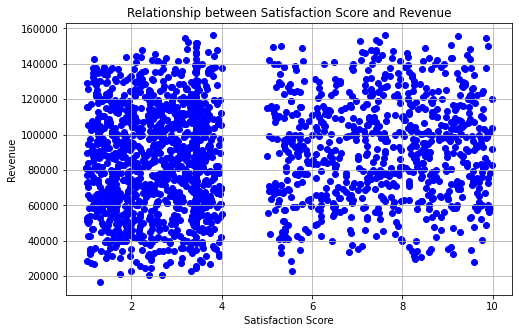

In [21]:
# we want to see how satisfaction_score is related with revenue
plt.figure(figsize=(8, 5))
plt.scatter(data['satisfaction_score'], data['revenue'], color='blue')
plt.title('Relationship between Satisfaction Score and Revenue')
plt.xlabel('Satisfaction Score')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# observation - satisfaction_score and revenue are not related and there seems to be a uniform distribution
# also there are no data points around 50% satisfaction_score, which is a bit strange

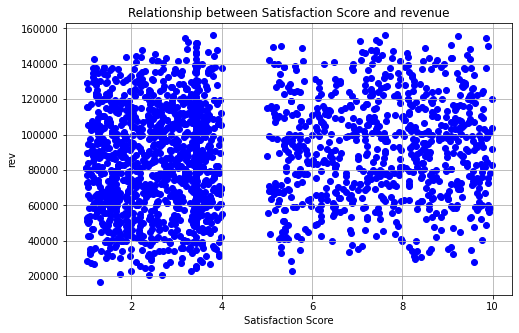

In [ ]:
# we want to see how revenue is related with nurse_patient_ratio
plt.figure(figsize=(8, 5))
plt.scatter(data['nurse_patient_ratio'], data['revenue'], color='blue')
plt.title('Relationship between Nurse Patient Ratio and Revenue')
plt.xlabel('Nurse Patient Ratio')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

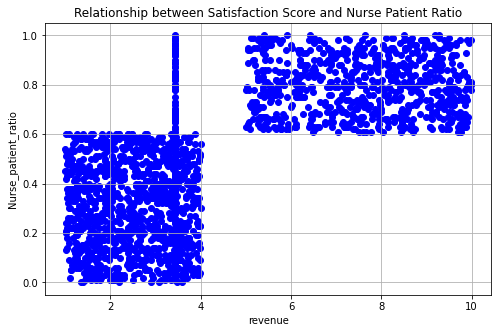

In [23]:
# we want to see how satisfaction_score is related with nurse_patient_ratio
plt.figure(figsize=(8, 5))
plt.scatter(data['satisfaction_score'], data['nurse_patient_ratio'], color='blue')
plt.title('Relationship between Satisfaction Score and Nurse Patient Ratio')
plt.xlabel('revenue')
plt.ylabel('Nurse_patient_ratio')
plt.grid(True)
plt.show()

# there is a clear relationship between satisfaction_score and nurse_patient_ratio
# hospitals with higher nurse_patient_ratio have higher satisfaction_score

Model Development

In [24]:
# the problem is maximising revenue generation - thus regression

# we will use linear regression model to predict revenue
# converting categorical variables to dummy variables
data = pd.get_dummies(data, columns=['ownership', 'hospital_location'])

# dropping clinic_id column as it is not needed for prediction
data = data.drop(['clinic_id'], axis=1)

data


,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue,ownership_Non-Profit,ownership_Profit,ownership_Public,hospital_location_Rural,hospital_location_Urban
0,23,0.40,12,2.04,55684.18,0,1,0,1,0
1,22,0.60,11,2.77,117115.85,0,1,0,0,1
2,47,0.37,31,3.13,72794.56,0,0,1,1,0
3,20,0.06,47,1.30,87447.23,1,0,0,1,0
4,33,0.94,40,5.90,88848.01,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1985,46,0.99,46,5.62,138695.55,0,1,0,0,1
1986,15,0.23,33,2.95,134584.60,0,0,1,0,1
1987,49,0.13,17,1.94,110533.42,0,0,1,1,0
1988,30,0.90,49,3.44,136719.84,0,0,1,0,1


In [25]:
# train test split
from sklearn.model_selection import train_test_split

X = data.drop(['revenue'], axis=1)
y = data['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# training model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# predicting on test data
y_pred = model.predict(X_test)

# evaluating model
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))



Mean Squared Error:  327493330.19367373
R2 Score:  0.6082599016220582


In [91]:
# results - we are getting a very high mean squared error and low r2 score, which means our model is not good
# we can try other models like random forest, xgboost, etc. and see if we get better results

In [34]:
# fitting random forest model and tune hyperparameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# hyperparameter tuning
params = {'n_estimators': [100, 200, 300, 400, 500],
          'max_depth': [3, 4, 5, 6, 7],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4, 5]}
rf = RandomForestRegressor()
grid = GridSearchCV(rf, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# best parameters
grid.best_params_

# best score
grid.best_score_

# predicting on test data
y_pred = grid.predict(X_test)

# evaluating model
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

In [100]:
# random forest does not increase the performance by much, thus we would need to do some feature engineering to improve the model

In [ ]:
# the model comparison shows about the selected approaches that revenue is not linearly dependent on the given features.
# thus linear regression is not sufficient to predict revenue


In [ ]:
# one of the goals of this project is to find out which factors are important for revenue generation
# we note from data visualisation that hospital_location is a good predictor of revenue
# clinic in urban areas have higher revenue than clinics in rural areas
# thus any new clinic should be located in urban areas to maximise revenue

# a KPI for urban clinics can be minumum revenue, which can be used to measure the performance of the clinics
# the minimum revenue can be set to be 1200000, which is the revenue for lower percentile of clinic
